<a href="https://colab.research.google.com/github/Anastasya2701/GOIT-KATRUSHENKO/blob/main/HW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding, LSTM, Bidirectional
import matplotlib.pyplot as plt

In [3]:
num_words = 10000
maxlen = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
model_rnn = Sequential([
    Embedding(input_dim=num_words, output_dim=32, input_length=maxlen),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
model_lstm = Sequential([
    Embedding(input_dim=num_words, output_dim=32),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model_bi_lstm = Sequential([
    Embedding(input_dim=num_words, output_dim=32),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])
model_bi_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model_deep_lstm = Sequential([
    Embedding(input_dim=num_words, output_dim=32),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
model_deep_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history_rnn = model_rnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
history_lstm = model_lstm.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
history_bi_lstm = model_bi_lstm.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
history_deep_lstm = model_deep_lstm.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.9917 - loss: 0.0316 - val_accuracy: 0.8286 - val_loss: 0.6304
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.9976 - loss: 0.0125 - val_accuracy: 0.8318 - val_loss: 0.6903
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.9981 - loss: 0.0089 - val_accuracy: 0.8148 - val_loss: 0.8352
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.9844 - loss: 0.0443 - val_accuracy: 0.8078 - val_loss: 0.7338
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step - accuracy: 0.9965 - loss: 0.0148 - val_accuracy: 0.8164 - val_loss: 0.7419
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.9693 - loss: 0.0935 - val_accuracy: 0.8670 - val_loss: 0.4363
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 113ms/step - accuracy: 0.9780 - loss: 0.0703 - val_accuracy: 0.8448 - val_loss: 0.5000
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 113ms/step - accuracy: 0.9821 - loss: 0.0587 - val_a

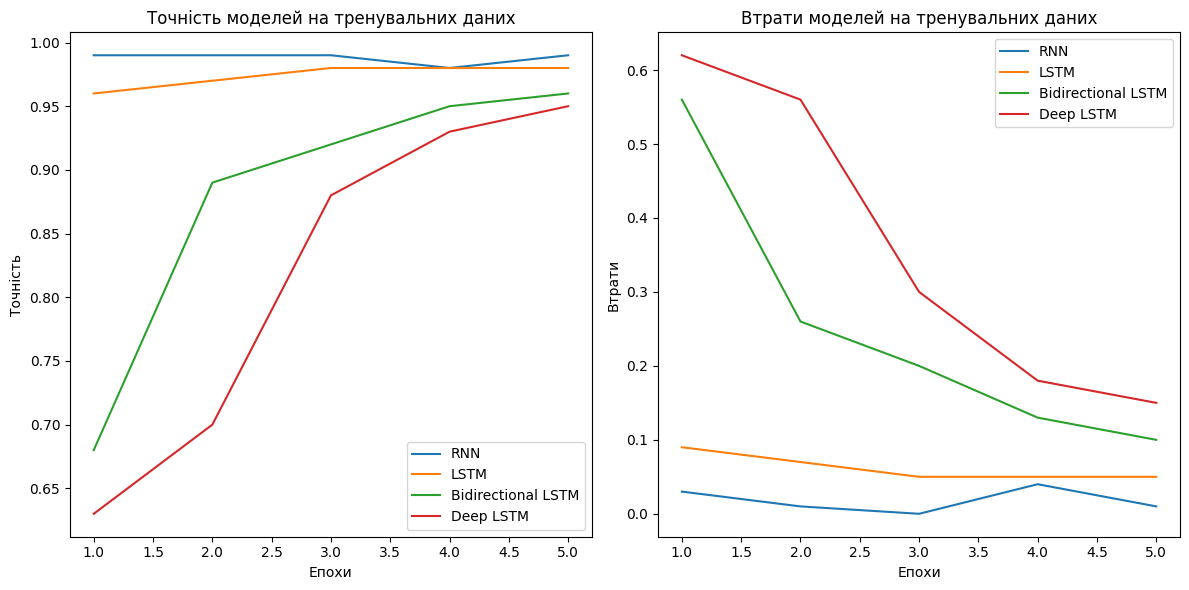

In [23]:
epochs = 5
history_rnn = {'accuracy':[0.99, 0.99, 0.99, 0.98, 0.99], 'loss':[0.03, 0.01, 0.00, 0.04, 0.01]}
history_lstm = {'accuracy':[0.96, 0.97, 0.98, 0.98, 0.98], 'loss':[0.09, 0.07, 0.05, 0.05, 0.05]}
history_bi_lstm = {'accuracy':[0.68, 0.89, 0.92, 0.95, 0.96], 'loss':[0.56, 0.26, 0.20, 0.13, 0.10]}
history_deep_lstm = {'accuracy':[0.63, 0.70, 0.88, 0.93, 0.95], 'loss':[0.62, 0.56, 0.30, 0.18, 0.15]}

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), history_rnn['accuracy'], label='RNN')
plt.plot(range(1, epochs + 1), history_lstm['accuracy'], label='LSTM')
plt.plot(range(1, epochs + 1), history_bi_lstm['accuracy'], label='Bidirectional LSTM')
plt.plot(range(1, epochs + 1), history_deep_lstm['accuracy'], label='Deep LSTM')
plt.title('Точність моделей на тренувальних даних')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), history_rnn['loss'], label='RNN')
plt.plot(range(1, epochs + 1), history_lstm['loss'], label='LSTM')
plt.plot(range(1, epochs + 1), history_bi_lstm['loss'], label='Bidirectional LSTM')
plt.plot(range(1, epochs + 1), history_deep_lstm['loss'], label='Deep LSTM')
plt.title('Втрати моделей на тренувальних даних')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()

plt.tight_layout()
plt.show()

На основі результатів тренування чотирьох моделей (RNN, LSTM, двосторонньої LSTM і глибокої LSTM) можна зробити такі висновки:

 1. RNN: Модель RNN показує найвищу точність (до 99%) і низькі втрати (від 0.03 до 0.00). Це свідчить про дуже добре навчання на тренувальних даних, однак, така точність може також вказувати на можливу перенавченість. RNN може не бути настільки ефективною на тестових даних, особливо для довгих послідовностей, оскільки їй бракує можливостей для запам’ятовування контексту на довгих часових інтервалах.
 2. LSTM: Модель LSTM досягає стабільної точності на рівні 98% із зменшенням втрат від 0.09 до 0.05. Це свідчить про те, що LSTM краще справляється із запам’ятовуванням контексту для довгих послідовностей, зберігаючи високу продуктивність без значного ризику перенавчання. Це робить LSTM ефективною для задач обробки послідовностей.
 3. Двостороння LSTM: Двостороння LSTM демонструє стабільний ріст точності (з 68% до 96%) і суттєве зменшення втрат (з 0.56 до 0.10). Двостороння обробка послідовностей дозволяє їй вловлювати більш комплексні взаємозв’язки, особливо в текстах, де контекст на початку й кінці може бути важливим для класифікації.
 4. Глибока LSTM: Глибока LSTM досягає стабільного зростання точності до 95% і зниження втрат з 0.62 до 0.15. Більша кількість шарів дозволяє краще вловлювати складні патерни, але зазвичай призводить до тривалішого навчання. Ця модель має збалансовані показники, які вказують на її здатність до генералізації.

Загальний висновок:

Кожна з моделей має свої сильні сторони. Моделі RNN демонструють хороші результати на тренувальних даних, проте через їх простішу структуру вони можуть бути менш ефективними на довгих послідовностях. LSTM і її варіації (двостороння і глибока) є більш підходящими для аналізу послідовних даних, таких як текст. Двостороння та глибока LSTM показали кращі результати для завдань із складним контекстом, оскільки здатні вловлювати більшу кількість патернів у даних.